## Task 4: Detecting fake notes with Keras

In [ ]:
#/==================================
#// Computer Vision
#// Student: Vandit Jyotindra Gajjar
#// Student ID: a1779153
#// Semester: 1
#// Year: 2020
#// Assignment: 3
#//===================================

In [1]:
import numpy as np
import keras as K 

Using TensorFlow backend.


## Data Loader 

In [2]:
def load_data(filename):
  x = np.loadtxt(filename, delimiter=',', usecols=[1,2,3,4], dtype=np.float32, skiprows=1)
  y = np.loadtxt(filename, delimiter=',', usecols=[5], dtype=np.float32, skiprows=1) 
  return (x, y)


In [3]:
import os.path
from os import path

TRAIN_DATA = 'https://cloudstor.aarnet.edu.au/plus/s/ieCuexofrjaZaYq/download'
TEST_DATA =  'https://cloudstor.aarnet.edu.au/plus/s/eLwLDo91lenckK1/download'

if not path.exists('test.csv'):
  !wget https://cloudstor.aarnet.edu.au/plus/s/eLwLDo91lenckK1/download -O test.csv

if not path.exists('train.csv'):
  !wget https://cloudstor.aarnet.edu.au/plus/s/ieCuexofrjaZaYq/download -O train.csv



## Training the network

In the cell below alot is happening. 

- input_dim: This is the number of features we are working with. For the current problem this is fixed to 4. 
- learning_rate: This determines how quickly the network updates it weight in response to the incoming gradients. Change too slowly and the network may never reach the lowest loss value, change too fast and you run into the danger of oscillating. Normal value range between very small (1e-5) to 0.1

- max_epochs: One epoch is a pass over the whole training set. Setting this number tell the training algorithm to do this many passes over the whole data. Since our data is really small (about a thousand samples) we can set this to something high in order for the network to converge. 

### Network definition

Line 9-11 define the architecture of the network. 

- Line 9: We tell keras that the model will be of the _Sequential_ type, that is data is going to flow from the input to the output and we do not have any forks / loops.

- Line 10: In keras, Dense means a fully connected layer. To our model we add a Dense Layer, with 5 neurons at the output. For the first layer, we have to specify the input size as well, given by the parameter *input_dim*. In our case this is fixed to 4. Assuming our input is $x$, the output after the fully connected layer will be of the form $y_1 = W_1x$
Another important thing is the *activation* parameter, which we have set to sigmoid. This is the non-linearlity which will be applied to the **output** of this layer that is $ y_{\sigma_{1}} = \sigma_{1}(W_{1}x) $.

- Line 11: We additionally have another layer which maps the output $y_{\sigma_{1}}$ to a single output, which another sigmoid as the activation function. The output of this sigmoid is used to classify if the class is 0 or 1. (-1 or 1 in case of Keras, but that conversion happens automatically and we do not need to worry about it.)


- Line 13 Just an architecture is not enough for learning. We need to specify a **loss function** as well as an optimizer. For this assignment, we are going to stick with SGD (Stochastic Gradient Descent) as the optimizier. However, we can choose different losses and see their effect on how we learn. All of this is brough together using **compile** in Keras.

- Line 17-18 loads the training and testing data

- Line 20 is where the training happens. This done by calling the fit() method of the model with the training data (train_x and train_y). Batch_size control how many samples are seen at the same time. This we can safely leave at 32 for the moment. We also pass the testing data to see how well we are doing along the way. This is just for evaluation and the network never uses this data to train. One run, this will print a line every epoch to report loss and accuracy for both the training and testing sets.

In [4]:
input_dim = 4 

learning_rate = 0.01 # Ranges from very small 0.0001 to 0.1
max_epochs =    400 # Another controllable parameter. 

model = K.models.Sequential()
model.add(K.layers.Dense(units= 200 , activation='relu', input_dim=input_dim))
model.add(K.layers.Dense(units= 200 , activation='relu')) 
#model.add(K.layers.Dense(units= 100 , activation='relu')) 
model.add(K.layers.Dense(units= 1, activation='sigmoid')) 

model.compile(loss='binary_crossentropy',  
              optimizer= K.optimizers.SGD(lr=learning_rate), 
              metrics=['accuracy'])  

(train_x, train_y) = load_data('train.csv')
(test_x, test_y)   = load_data('test.csv')

h = model.fit(train_x, train_y, 
              batch_size=32,
              epochs=max_epochs, 
              verbose=2, 
              validation_data = (test_x, test_y)
              )






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 1098 samples, validate on 274 samples
Epoch 1/400
 - 5s - loss: 0.6795 - acc: 0.6503 - val_loss: 0.6703 - val_acc: 0.5620
Epoch 2/400
 - 0s - loss: 0.6666 - acc: 0.5546 - val_loss: 0.6597 - val_acc: 0.5620
Epoch 3/400
 - 0s - loss: 0.6582 - acc: 0.5537 - val_loss: 0.6525 - val_acc: 0.5620
Epoch 4/400
 - 0s - loss: 0.6519 - acc: 0.5701 - val_loss: 0.6460 - val_acc: 0.5657
Epoch 5/400
 - 0s - loss: 0.6459 - acc: 0.5783 - val_loss: 0.6399 - val_acc: 0.5839
Epoch 6/400
 - 0s - loss: 0.6403 - acc: 0.5893 - val_loss: 0.6343 - val_acc: 0.6095
Epoch 7/400
 - 0s - loss: 0.6348 - acc: 0.6084 - val_loss: 0.6285 - val_acc: 0.6241
Epoch 8/400
 - 0s - loss: 0.6292 - acc: 0.6248 - val_loss: 0.6228 - val_acc: 0.6423
Epoch 9/400
 - 0s - loss: 0.6235 - acc: 0.6339 - val_loss: 0.6169 - val_acc: 0.6679
Epoch 10/400
 - 0s - loss: 0.6177 - acc: 0.6512 - val_loss: 0.6107 - val_acc: 0.6715
Epoch 11/400

Epoch 79/400
 - 0s - loss: 0.1644 - acc: 0.9526 - val_loss: 0.1610 - val_acc: 0.9416
Epoch 80/400
 - 0s - loss: 0.1597 - acc: 0.9508 - val_loss: 0.1571 - val_acc: 0.9416
Epoch 81/400
 - 0s - loss: 0.1570 - acc: 0.9481 - val_loss: 0.1535 - val_acc: 0.9416
Epoch 82/400
 - 0s - loss: 0.1535 - acc: 0.9554 - val_loss: 0.1529 - val_acc: 0.9453
Epoch 83/400
 - 0s - loss: 0.1498 - acc: 0.9554 - val_loss: 0.1482 - val_acc: 0.9489
Epoch 84/400
 - 0s - loss: 0.1468 - acc: 0.9563 - val_loss: 0.1449 - val_acc: 0.9489
Epoch 85/400
 - 0s - loss: 0.1438 - acc: 0.9563 - val_loss: 0.1418 - val_acc: 0.9489
Epoch 86/400
 - 0s - loss: 0.1408 - acc: 0.9581 - val_loss: 0.1415 - val_acc: 0.9489
Epoch 87/400
 - 0s - loss: 0.1382 - acc: 0.9627 - val_loss: 0.1363 - val_acc: 0.9489
Epoch 88/400
 - 0s - loss: 0.1352 - acc: 0.9617 - val_loss: 0.1350 - val_acc: 0.9489
Epoch 89/400
 - 0s - loss: 0.1321 - acc: 0.9617 - val_loss: 0.1311 - val_acc: 0.9489
Epoch 90/400
 - 0s - loss: 0.1292 - acc: 0.9654 - val_loss: 0.128

Epoch 175/400
 - 0s - loss: 0.0471 - acc: 0.9818 - val_loss: 0.0544 - val_acc: 0.9891
Epoch 176/400
 - 0s - loss: 0.0474 - acc: 0.9854 - val_loss: 0.0514 - val_acc: 0.9818
Epoch 177/400
 - 0s - loss: 0.0465 - acc: 0.9836 - val_loss: 0.0497 - val_acc: 0.9818
Epoch 178/400
 - 0s - loss: 0.0457 - acc: 0.9836 - val_loss: 0.0493 - val_acc: 0.9818
Epoch 179/400
 - 0s - loss: 0.0463 - acc: 0.9827 - val_loss: 0.0489 - val_acc: 0.9781
Epoch 180/400
 - 0s - loss: 0.0453 - acc: 0.9827 - val_loss: 0.0501 - val_acc: 0.9818
Epoch 181/400
 - 0s - loss: 0.0459 - acc: 0.9854 - val_loss: 0.0486 - val_acc: 0.9818
Epoch 182/400
 - 0s - loss: 0.0450 - acc: 0.9882 - val_loss: 0.0483 - val_acc: 0.9818
Epoch 183/400
 - 0s - loss: 0.0447 - acc: 0.9836 - val_loss: 0.0485 - val_acc: 0.9818
Epoch 184/400
 - 0s - loss: 0.0442 - acc: 0.9882 - val_loss: 0.0476 - val_acc: 0.9781
Epoch 185/400
 - 0s - loss: 0.0443 - acc: 0.9836 - val_loss: 0.0474 - val_acc: 0.9781
Epoch 186/400
 - 0s - loss: 0.0442 - acc: 0.9854 - val

Epoch 271/400
 - 0s - loss: 0.0302 - acc: 0.9891 - val_loss: 0.0334 - val_acc: 0.9927
Epoch 272/400
 - 0s - loss: 0.0298 - acc: 0.9891 - val_loss: 0.0331 - val_acc: 0.9854
Epoch 273/400
 - 0s - loss: 0.0299 - acc: 0.9882 - val_loss: 0.0339 - val_acc: 0.9891
Epoch 274/400
 - 0s - loss: 0.0292 - acc: 0.9936 - val_loss: 0.0326 - val_acc: 0.9854
Epoch 275/400
 - 0s - loss: 0.0294 - acc: 0.9891 - val_loss: 0.0333 - val_acc: 0.9927
Epoch 276/400
 - 0s - loss: 0.0294 - acc: 0.9936 - val_loss: 0.0325 - val_acc: 0.9854
Epoch 277/400
 - 0s - loss: 0.0295 - acc: 0.9900 - val_loss: 0.0324 - val_acc: 0.9854
Epoch 278/400
 - 0s - loss: 0.0286 - acc: 0.9900 - val_loss: 0.0349 - val_acc: 0.9891
Epoch 279/400
 - 0s - loss: 0.0297 - acc: 0.9909 - val_loss: 0.0324 - val_acc: 0.9927
Epoch 280/400
 - 0s - loss: 0.0290 - acc: 0.9918 - val_loss: 0.0321 - val_acc: 0.9854
Epoch 281/400
 - 0s - loss: 0.0288 - acc: 0.9882 - val_loss: 0.0320 - val_acc: 0.9854
Epoch 282/400
 - 0s - loss: 0.0287 - acc: 0.9936 - val

Epoch 367/400
 - 0s - loss: 0.0223 - acc: 0.9927 - val_loss: 0.0250 - val_acc: 0.9964
Epoch 368/400
 - 0s - loss: 0.0219 - acc: 0.9973 - val_loss: 0.0256 - val_acc: 0.9854
Epoch 369/400
 - 0s - loss: 0.0222 - acc: 0.9945 - val_loss: 0.0257 - val_acc: 0.9927
Epoch 370/400
 - 0s - loss: 0.0221 - acc: 0.9964 - val_loss: 0.0248 - val_acc: 0.9964
Epoch 371/400
 - 0s - loss: 0.0219 - acc: 0.9964 - val_loss: 0.0247 - val_acc: 0.9964
Epoch 372/400
 - 0s - loss: 0.0223 - acc: 0.9936 - val_loss: 0.0247 - val_acc: 0.9964
Epoch 373/400
 - 0s - loss: 0.0215 - acc: 0.9973 - val_loss: 0.0251 - val_acc: 0.9854
Epoch 374/400
 - 0s - loss: 0.0219 - acc: 0.9945 - val_loss: 0.0245 - val_acc: 0.9964
Epoch 375/400
 - 0s - loss: 0.0217 - acc: 0.9964 - val_loss: 0.0245 - val_acc: 0.9964
Epoch 376/400
 - 0s - loss: 0.0218 - acc: 0.9973 - val_loss: 0.0257 - val_acc: 0.9927
Epoch 377/400
 - 0s - loss: 0.0213 - acc: 0.9973 - val_loss: 0.0247 - val_acc: 0.9891
Epoch 378/400
 - 0s - loss: 0.0217 - acc: 0.9945 - val

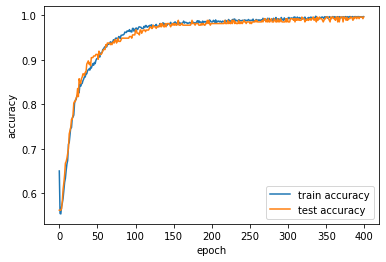

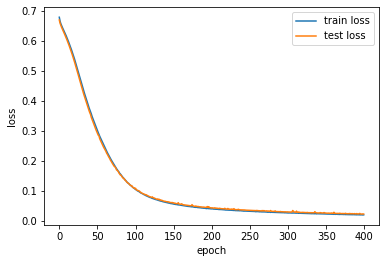


Loss, accuracy on test data: 
0.0232 99.64%


In [5]:
import matplotlib.pyplot as plt

plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.legend(("train accuracy","test accuracy"))
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(("train loss","test loss"))
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

eval_results = model.evaluate(test_x, test_y, verbose=0) 
print("\nLoss, accuracy on test data: ")
print("%0.4f %0.2f%%" % (eval_results[0], eval_results[1]*100))